# `The Neural Network`

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
%%shell

rm -rf training_checkpoints
rm -rf Confessions-Generator
rm text_data.txt
git clone https://github.com/AurumnPegasus/Confessions-Generator.git

rm: cannot remove 'text_data.txt': No such file or directory
Cloning into 'Confessions-Generator'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 148 (delta 56), reused 115 (delta 28), pack-reused 0
Receiving objects: 100% (148/148), 30.47 MiB | 27.90 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [0]:
# Netowrk Requirements
import numpy as np
import tensorflow as tf

# Uitlities
import os
import random
import json
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [0]:
# NN Requirements
# path to data file
path_to_file = "/content/Confessions-Generator/DataSet/iiit_source.txt"
# The maximum length sentence we want for a single input in characters
seq_length = 100
# Batch size
BATCH_SIZE = 256
# Buffer size to shuffle the dataset
BUFFER_SIZE = 10000
# The embedding dimension
embedding_dim = 256
# Number of RNN units here, LSTM units are used
rnn_units = 1024
# Total number of times the model sees the data
EPOCHS = 10

# Databse Requirements
# total confessions
database_size = 300

In [81]:
# Read the file in utf-8 format
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text = number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 6482303 characters


In [82]:
# Take a look at the first 250 characters in text
print(text[:1000])

 Sometimes when I get A\'s on big tests I jerk off on my tests. That being said I get really annoyed when the prof doesn\'t let me have my test back.c30) why is our generation obsessed with 2010 pop trash, like party in the india wasn\'t even good thenX31) Maybe this confessions page is dead because the admin doesn\'t check often :) (seriously, I\'m writing this on October 30, 2018). And maybe that\'s the way it was meant to be :(.
*note from admin* nah im recruiting mods to help me so if you want to be a mod...`28) any boy out there want to pretend to be my boyfriend so i can tell my mom i\'m dating someone27) Tbh this page would be a lot less dead if you switched it to iiit Crushes and kept the anonymous submission format.
*note from admin* all of the submissions ARE anonymous.26) Hot take: Brett Kavanaugh is thicccccc I\'d pound beers with him any day. My man killin the game with his creative asf drinking games woooooooj29) I just want to be in a relationship for the winter because 

In [83]:
# The unique characters in the file
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

96 unique characters


In [0]:
# Creating a mapping from unique characters to indices
char2idx = {c:i for i, c in enumerate(vocab)}
# Creating a reverse mapping as well
idx2char = np.array(vocab)

# Convert the entire text to their encodings
text_as_int = np.array([char2idx[c] for c in text])

In [0]:
# +1 because we shift by 1 character each time
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [0]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [0]:
def split_input_target(chunk):
    # splits the input chunk
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [0]:
# shuffle the dataset
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [0]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

In [0]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  """
  Builds the Sequential Model, using Embeddings to create inputs to tensors of specified dimensions, and then find dependencies using LSTM units. At the end is the dense layer.

  input params:
  vocab_size: nubmer of unique characters
  embedding_dim: number of dimension in the embedding tensor
  rnn_units: self explanatory
  batch_size: number of samples seen before gradient updation

  output:
  model created
  """
  
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [0]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (256, None, 256)          24576     
_________________________________________________________________
lstm_6 (LSTM)                (256, None, 1024)         5246976   
_________________________________________________________________
dense_6 (Dense)              (256, None, 96)           98400     
Total params: 5,369,952
Trainable params: 5,369,952
Non-trainable params: 0
_________________________________________________________________


In [0]:
def custom_loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [0]:
model.compile(optimizer='adam', loss=custom_loss)

In [0]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [96]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=checkpoint_callback)

Epoch 1/10
250/250 [==============================] - 124s 494ms/step - loss: 2.5211
Epoch 2/10
250/250 [==============================] - 124s 494ms/step - loss: 1.7824
Epoch 3/10
250/250 [==============================] - 124s 495ms/step - loss: 1.5474
Epoch 4/10
250/250 [==============================] - 124s 495ms/step - loss: 1.4472
Epoch 5/10
250/250 [==============================] - 124s 494ms/step - loss: 1.3893
Epoch 6/10
250/250 [==============================] - 124s 494ms/step - loss: 1.3502
Epoch 7/10
250/250 [==============================] - 124s 495ms/step - loss: 1.3218
Epoch 8/10
250/250 [==============================] - 124s 496ms/step - loss: 1.2992
Epoch 9/10
250/250 [==============================] - 124s 495ms/step - loss: 1.2799
Epoch 10/10
250/250 [==============================] - 124s 497ms/step - loss: 1.2634


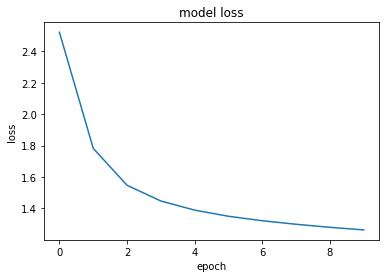

In [97]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Epoch 1/5
250/250 [==============================] - 123s 494ms/step - loss: 1.2510
Epoch 2/5
250/250 [==============================] - 124s 494ms/step - loss: 1.2356
Epoch 3/5
250/250 [==============================] - 123s 494ms/step - loss: 1.2232
Epoch 4/5
250/250 [==============================] - 124s 494ms/step - loss: 1.2119
Epoch 5/5
250/250 [==============================] - 124s 495ms/step - loss: 1.2006


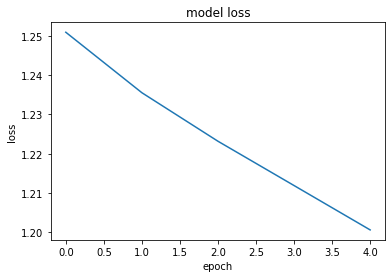

In [112]:
# Do it again, if needed

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=BATCH_SIZE)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))
model.compile(optimizer='adam', loss=custom_loss)

new_history = model.fit(dataset, epochs=5, callbacks=checkpoint_callback)

plt.plot(new_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# `Database Generation`

In [0]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [0]:
def generate_text(model, out_size, start_string):
    # Number of characters to generate
    num_generate = out_size

    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperatures results in more predictable text.
    # Higher temperatures results in more surprising text.
    temperature = 1.0

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [115]:
print(generate_text(model, 250, " "))

 blast ignorand who against me and my parents have done in taking guys in life. Usually I hope you could about this one time, and the other professor breaks are."
Blue kids are coming for onil single sophomore and that I would never eventually docemft


In [118]:
database = [[], [], []]

for _ in tqdm_notebook(range(database_size)):

    # random size
    user_jo_bola = random.randint(60, 500)
    temp_conf_string = generate_text(model, user_jo_bola, start_string=" ")
    index = temp_conf_string.rfind('.')
    conf_string = temp_conf_string[:index] + "."

    if len(conf_string) < 180:
        # relative_conf = "smallpp"
        database[0].append(conf_string)
    elif len(conf_string) < 300:
        # relative_conf = "mediumpp"
        database[1].append(conf_string)
    else:
        # relative_conf = "largepp"
        database[2].append(conf_string)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
pp_sizes = ["smallpp", "mediumpp", "largepp"]

for i, name in enumerate(pp_sizes):
    with open(f"/content/drive/My Drive/Database/{name}_database.txt", 'w', encoding='utf-8') as f:
        # json.dump({"content":database[i]}, f, ensure_ascii=False)
        for j in database[i]:
            if len(j) < 50:
                continue
            f.write("[\"")
            f.write(j)
            f.write("\"],")